In [1]:
#Question 3: Implement the NAND table 
import numpy as np

# NAND function definition with inputs and target outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # input combinations for NAND
y = np.array([1, 1, 1, 0])  # target output for NAND gate

# Define the Perceptron class
class Perceptron:
    def __init__(self, learning_rate=0.1, n_iter=10):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Initialize weights and bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        for _ in range(self.n_iter):
            for xi, target in zip(X, y):
                linear_output = np.dot(xi, self.weights) + self.bias
                prediction = 1 if linear_output >= 0 else 0
                
                # Update weights and bias if prediction is incorrect
                update = self.learning_rate * (target - prediction)
                self.weights += update * xi
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)

# Instantiate and train the perceptron for NAND
nand_perceptron = Perceptron()
nand_perceptron.fit(X, y)

# Test the perceptron
predictions = nand_perceptron.predict(X)
print("NAND Gate Predictions:", predictions)


NAND Gate Predictions: [1 1 1 0]


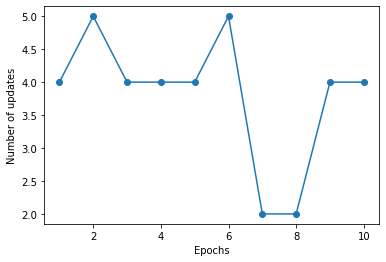

In [2]:
#Perceptron Implementation
import numpy as np
import random
import matplotlib.pyplot as plt

# Load dataset (assuming dataset is already available as `X` and `y`)
# Since data is not provided, here's an example with dummy data
X = np.array([[5.1, 1.4], [5.1, 3.0], [5.7, 4.1], [5.8, 1.5], [6.0, 1.4]])
y = np.array([-1, -1, 1, -1, 1])

# Define the Perceptron class
class Perceptron:
    def __init__(self, lrate=0.1, no_iter=50):
        self.lrate = lrate
        self.no_iter = no_iter

    def fit(self, X, y):
        self.weights = [random.uniform(-1.0, 1.0) for _ in range(1 + X.shape[1])]
        self.list_errors = []
        
        for _ in range(self.no_iter):
            cur_error = 0
            for xi, label in zip(X, y):
                delta_w = self.lrate * (label - self.predict(xi)) * np.insert(xi, 0, 1)
                self.weights += delta_w
                cur_error += int(delta_w.sum() != 0)
            self.list_errors.append(cur_error)
        
        return self

    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict(self, X):
        return np.where(self.net_input(X) > 0, 1, -1)

# Initialize and train the Perceptron model
model = Perceptron(no_iter=10)
model.fit(X, y)

# Plot errors vs. number of iterations
plt.plot(range(1, len(model.list_errors) + 1), model.list_errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()


In [3]:
# Backpropagation with XOR Dataset
import numpy as np

# Sigmoid activation and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])

# Network parameters
input_nodes = 2
hidden_nodes = 2
output_nodes = 1
hidden_weights = np.random.uniform(size=(input_nodes, hidden_nodes))
output_weights = np.random.uniform(size=(hidden_nodes, output_nodes))
learning_rate = 0.1
iterations = 10000

# Forward pass function
def forward(X):
    hidden_input = np.dot(X, hidden_weights)
    hidden_output = sigmoid(hidden_input)
    output_input = np.dot(hidden_output, output_weights)
    output_output = sigmoid(output_input)
    return hidden_output, output_output

# Training with backpropagation
for i in range(iterations):
    hidden_output, output_output = forward(X)
    
    # Calculate error
    output_error = Y - output_output
    output_delta = output_error * sigmoid_derivative(output_output)
    
    # Backpropagation
    hidden_error = output_delta.dot(output_weights.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_output)
    
    # Update weights
    output_weights += hidden_output.T.dot(output_delta) * learning_rate
    hidden_weights += X.T.dot(hidden_delta) * learning_rate

    # Print error every 1000 iterations
    if i % 1000 == 0:
        print(f"Iteration {i}, Error: {np.mean(np.abs(output_error))}")

# Final output
_, final_output = forward(X)
print("Final output after training:")
print(final_output)


Iteration 0, Error: 0.4975736775363875
Iteration 1000, Error: 0.4966201728532745
Iteration 2000, Error: 0.47626217781387736
Iteration 3000, Error: 0.43539916618872687
Iteration 4000, Error: 0.3947932117801324
Iteration 5000, Error: 0.3601775033856335
Iteration 6000, Error: 0.33123182608027696
Iteration 7000, Error: 0.306920759611814
Iteration 8000, Error: 0.28631077631710644
Iteration 9000, Error: 0.2686588615011878
Final output after training:
[[0.18778763]
 [0.75013828]
 [0.7501307 ]
 [0.32604076]]


In [5]:
#Backpropagation with Two Output Nodes
import numpy as np

# Sigmoid activation function and derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# XOR dataset with two output nodes
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[1, 0], [0, 1], [0, 1], [1, 0]])  # Each target is one-hot encoded

# Network structure
input_nodes = 2
hidden_nodes = 2
output_nodes = 2  # Two output nodes for the two classes

# Initialize weights randomly
hidden_weights = np.random.uniform(size=(input_nodes, hidden_nodes))
output_weights = np.random.uniform(size=(hidden_nodes, output_nodes))
learning_rate = 0.1
iterations = 10000

# Forward pass function
def forward(X):
    hidden_input = np.dot(X, hidden_weights)
    hidden_output = sigmoid(hidden_input)
    output_input = np.dot(hidden_output, output_weights)
    output_output = sigmoid(output_input)
    return hidden_output, output_output

# Training with backpropagation
for i in range(iterations):
    hidden_output, output_output = forward(X)
    
    # Calculate output error and delta
    output_error = Y - output_output
    output_delta = output_error * sigmoid_derivative(output_output)
    
    # Calculate hidden error and delta
    hidden_error = output_delta.dot(output_weights.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_output)
    
    # Update weights
    output_weights += hidden_output.T.dot(output_delta) * learning_rate
    hidden_weights += X.T.dot(hidden_delta) * learning_rate

    # Print error every 1000 iterations
    if i % 1000 == 0:
        print(f"Iteration {i}, Error: {np.mean(np.abs(output_error))}")

# Final output
_, final_output = forward(X)
print("Final output after training:")
print(final_output)


Iteration 0, Error: 0.49971017163167275
Iteration 1000, Error: 0.49994462643426085
Iteration 2000, Error: 0.4994674404847913
Iteration 3000, Error: 0.4923051637841134
Iteration 4000, Error: 0.45328216079198974
Iteration 5000, Error: 0.4103289787593215
Iteration 6000, Error: 0.3726292409564947
Iteration 7000, Error: 0.3413890580927094
Iteration 8000, Error: 0.31534399274336483
Iteration 9000, Error: 0.2933995397116229
Final output after training:
[[0.78971849 0.21153384]
 [0.26862944 0.73050821]
 [0.26861595 0.73052164]
 [0.65068967 0.3502806 ]]
